In [ ]:
! pip install hvplot

In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [ ]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)




:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [ ]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)


# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [ ]:
# Create an empty list to store the inertia values
inertia = []


In [ ]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: xlabel='k'>

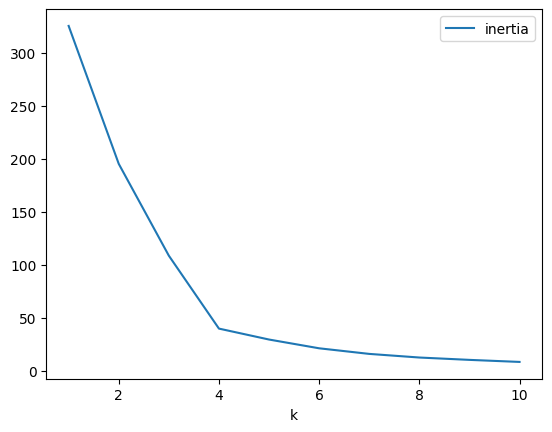

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k","inertia")

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [ ]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state= 0)

In [ ]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
data_predict = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
data_predict

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Create a copy of the DataFrame
df_crypto = df_market_data_scaled.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
df_crypto["Predicted Clusters"] = data_predict

# Display sample data
df_crypto.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
k4_scatter =df_crypto.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Predicted Clusters",
    hover_cols = "coin_id",
    title="Segement Clusters",
    xlabel=" Price Change Percentage 24 Hours",
    ylabel="Price Change Percentage 7 Days",
)

hvplot.show(k4_scatter)

Launching server at http://localhost:44821


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

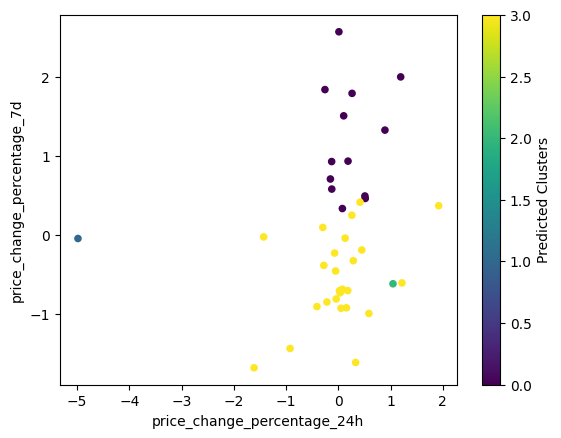

In [ ]:
df_crypto.plot.scatter("price_change_percentage_24h", "price_change_percentage_7d", c="Predicted Clusters", cmap= "viridis")

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
df_market_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
df_market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** Roughly 89%

In [ ]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df_scaled_market_pca = pd.DataFrame(
    df_market_pca,
    columns=["PCA1", "PCA2","PCA3"])


# Copy the crypto names from the original data
df_scaled_market_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_scaled_market_pca= df_scaled_market_pca.set_index("coin_id")

# Display sample data
df_scaled_market_pca.sample(10)

,PCA1,PCA2,PCA3
coin_id,,,
nem,0.608974,0.563532,-1.148742
tron,-0.393352,-0.108192,-0.012756
theta-token,2.676868,-0.013954,-1.965207
ftx-token,-0.593142,0.021485,0.209911
digibyte,-0.297910,-0.191126,-0.909602
ontology,-0.632355,-2.108117,-0.652227
okb,0.064075,-1.269825,-1.098829
ethereum-classic,-0.579924,-0.356334,-0.114942
celsius-degree-token,4.792395,6.767679,-1.986985


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 11))

In [ ]:
# Create an empty list to store the inertia values
inertia_pca = []


In [ ]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for j in k:
    pca_model = KMeans(n_clusters=j, random_state=0)
    pca_model.fit(df_scaled_market_pca)
    inertia_pca.append(pca_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k_pca": k_pca,
    "inertia_pca": inertia_pca
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca

,k_pca,inertia_pca
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


<Axes: xlabel='k_pca'>

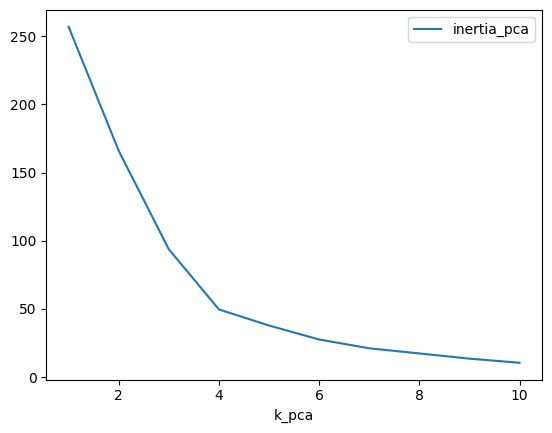

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot("k_pca", "inertia_pca")

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it doesn't

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
k_pca = model = KMeans(n_clusters=4)

In [ ]:
# Fit the K-Means model using the PCA data
k_pca.fit(df_scaled_market_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
data_predict_pca = k_pca.predict(df_scaled_market_pca)

# Print the resulting array of cluster values.
data_predict_pca[:5]

array([0, 0, 1, 1, 0], dtype=int32)

In [ ]:
# Create a copy of the DataFrame with the PCA data
df_pca_crypto = df_scaled_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_crypto["predicted clusters"]=data_predict_pca

# Display sample data
df_pca_crypto.sample(10)

,PCA1,PCA2,PCA3,predicted clusters
coin_id,,,,
theta-token,2.676868,-0.013954,-1.965207,1
crypto-com-chain,-0.248198,-1.376252,-1.462026,1
binancecoin,-0.516534,1.388377,0.804071,0
eos,-0.693425,-0.473815,-0.527597,1
okb,0.064075,-1.269825,-1.098829,1
tether,-0.433070,-0.168126,-0.641752,1
leo-token,-0.413296,-0.674115,-1.076628,1
ontology,-0.632355,-2.108117,-0.652227,1
ethlend,8.089018,-3.896891,2.301382,2


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
crypto_scatter = df_pca_crypto.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="predicted clusters",
    cmap = "viridis",
    hover_cols = "coin_id",
    title="Segement Clusters",
    xlabel=" PCA1",
    ylabel="PCA2",
)
hvplot.show(crypto_scatter)

Launching server at http://localhost:46083


<Axes: xlabel='PCA1', ylabel='PCA2'>

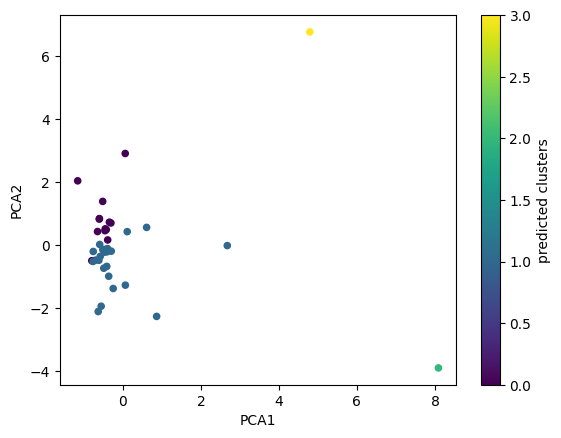

In [ ]:
df_pca_crypto.plot.scatter('PCA1','PCA2', c = 'predicted clusters', cmap = 'viridis')

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k) +df_elbow_pca.hvplot.line(x="k_pca", y="inertia_pca", title="PCA Elbow Curve", xticks=k)


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

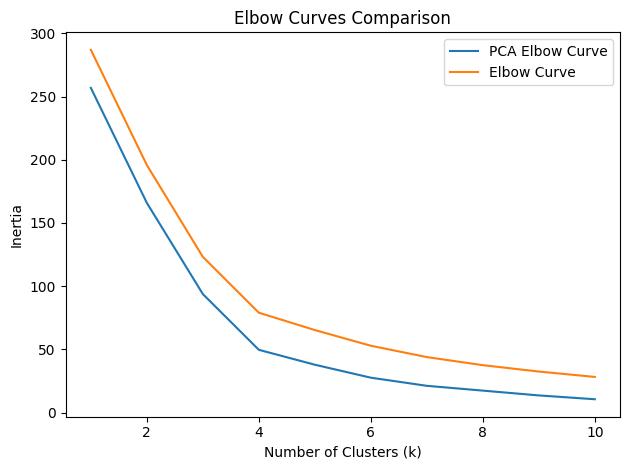

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_elbow_pca['k_pca'], df_elbow_pca['inertia_pca'], label='PCA Elbow Curve')

ax.plot(df_elbow['k'], df_elbow['inertia'], label='Elbow Curve')

ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Curves Comparison')
ax.legend()


plt.tight_layout()
plt.show()

In [ ]:
# Composite plot to contrast the clusters
df_crypto.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Predicted Clusters",
    hover_cols = "coin_id",
    title="Segement Clusters",
    xlabel=" Price Change Percentage 24 Hours",
    ylabel="Price Change Percentage 7 Days",
) + df_pca_crypto.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="predicted clusters",
    cmap = "viridis",
    hover_cols = "coin_id",
    title="Segement Clusters",
    xlabel=" PCA1",
    ylabel="PCA2",
)



:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Predicted Clusters,coin_id)
   .Scatter.II :Scatter   [PCA1]   (PCA2,predicted clusters,coin_id)

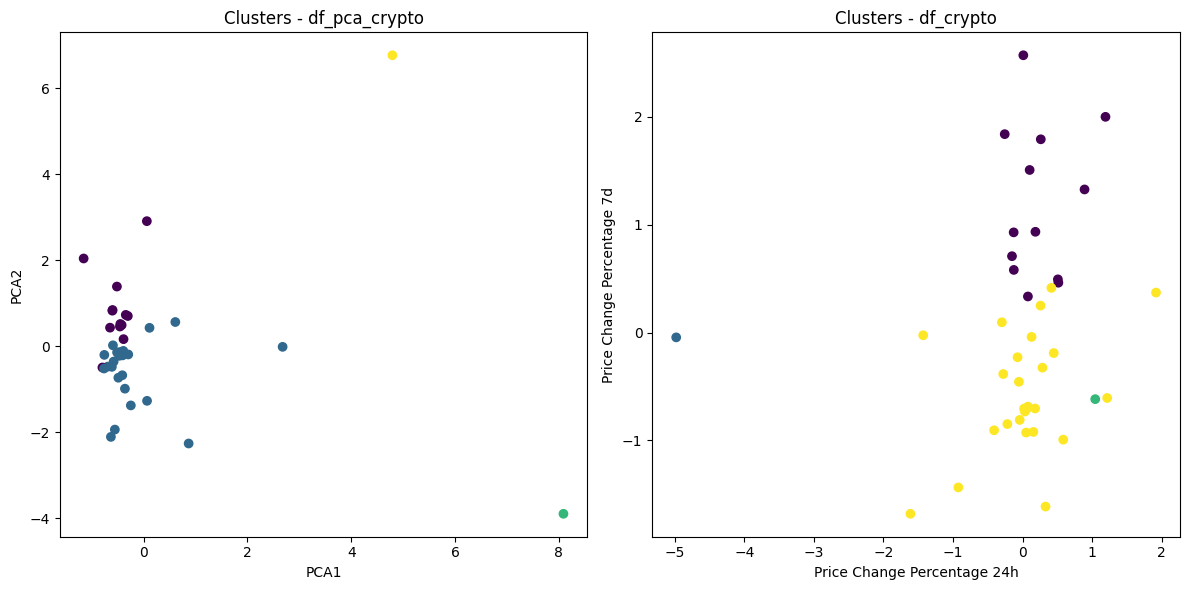

In [ ]:
# Composite plot to contrast the clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(df_pca_crypto['PCA1'], df_pca_crypto['PCA2'], c=df_pca_crypto['predicted clusters'], cmap='viridis')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('PCA2')
ax[0].set_title('Clusters - df_pca_crypto')

ax[1].scatter(df_crypto['price_change_percentage_24h'], df_crypto['price_change_percentage_7d'], c=df_crypto['Predicted Clusters'], cmap='viridis')
ax[1].set_xlabel('Price Change Percentage 24h')
ax[1].set_ylabel('Price Change Percentage 7d')
ax[1].set_title('Clusters - df_crypto')

plt.tight_layout()

plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The inertia drop a little steeper when using fewer features, and the predicted clusters are a bit more spaced out and overlap a lot less